# Introduction

This notebook contains the coding assignment for Akridata's ML internships (September 2025).

  * [Job description](https://docs.google.com/document/d/e/2PACX-1vRwHkY0TLebdoe-meFsgM3p3DdReJq5Kl1fVN5-tHZrYEuXwo7vYvbIkxa2oQNH4D26Hsv9wP7Mup1l/pub)
  * [Application form](https://docs.google.com/forms/d/e/1FAIpQLSdTW9OQXXlHkjKCcxgil4H3BgwPvOrlnqzL0JsqBh5xyAK0aQ/viewform?usp=dialog)

## Why This Assignment Exists

We receive far more applications than we can meaningfully review — it's too easy to click “Apply” online. That flood inevitably includes many who aren't a fit for the role. We don't want to filter by college names or grades alone.

So we add **a bit of friction**: a real, hands-on task. Yes, it's extra work — but it's a better signal than a resume or a keyword-stuffed LinkedIn profile.

We've picked something that:
- Is technically straightforward to complete in a reasonable time.
- Is interesting and directly relevant to the problems we solve.
- Gives you a taste of how we actually work.


## Publishing Your Code

Once the interview process wraps up, we encourage you to publish your solution and add it to your portfolio. Until then, please keep it private so everyone gets a fair shot.

## The Task: Defect Classification

At Akridata, we focus on the **critical edge cases of manufacturing inspection** — where failures are costly, dangerous, or both.  
Think precision lenses and glass components that could shatter, ball bearings that can fail in high-stress machinery, or kilometers of railway track that no human can realistically inspect end-to-end. We also handle inspection problems where rules-based computer vision falls short — like detecting subtle miswirings in cable assemblies, spotting PCB defects in complex layouts, or checking extremely small parts where manual inspection is painfully slow.

This task gives you a glimpse into vision-based inspection work.  
You'll tackle **zero-shot defect classification** for a real-world-like case: detecting surface defects in hazelnut images from the MVTec-AD dataset, using OpenAI's `CLIP` vision-language model.


# IMPORTANT

## Before proceeding, copy this notebook into your Google Drive, and make changes to your local copy.

You have to share the link to your local copy.

# Zero-Shot Defect Classification with CLIP (Git + Colab Workflow)

## Overview

In this assignment, you will:
- Use OpenAI's CLIP model to perform zero-shot defect classification on the `hazelnut` subset of the MVTec-AD dataset (test split).
- Implement a configuration class (Pydantic) and a classification function in Python.
- Practice basic Git workflows: branching, committing, merging, and preserving commit history.
- Run your completed code on real image data and produce a confusion matrix.

All work must be done entirely inside this Colab notebook, including:
- Running Git commands
- Editing files in the cloned repository
- Installing and importing packages

We will run the code in this notebook to verify the submission.

*The cells marked as 'TO DO' are the ones where you have to edit code (or text).*


---

## Task Sequence


* **Data Setup**
   - Download and extract the MVTec-AD dataset.
   - Verify that `hazelnut` images are present in the test split.

* **Repository Setup**
   - Clone the provided repository into your Colab environment.
   - Switch to the `feature` branch for development.
   - Place the hazelnut images from the test split inside the `data/` directory of the cloned repository.

* **Implementation**
   - Complete the `DefectClassificationSpec` class in `spec.py`.
   - Complete the `classify_defects()` function in `classification.py`.

* **Execution**
   - Run your classification function on the downloaded test dataset.
   - Generate and display a confusion matrix comparing predictions with ground truth.

* **Git Workflow**
   - Commit your changes to the `feature` branch.
   - Merge the `feature` branch into the `main` branch.
   - Switch to `main` to prepare for execution.

* **Submission**
   - Leave all code cells and outputs visible in this notebook.
   - Generate a link to the notebook using the `Share` button in the top-right of the Colab page.
   - Verify that you can see the contents of the notebook from a different browser where you are not signed in to your account.
   - Share the link to the notebook in our application form.

## References
- [CLIP](https://github.com/openai/CLIP)
- [MVTec-AD](https://www.mvtec.com/company/research/datasets/mvtec-ad)
- [Pydantic](https://docs.pydantic.dev/latest/)
- [CLIP-AC (WinCLIP)](https://arxiv.org/abs/2303.14814)
  - See section 4.1 in the WinCLIP paper for a
    basic two-class design for anomaly classification.
  - Extend this to a defect classification problem for multiple defect classes for this task.

# Download and extract dataset

In [41]:
#@title Download a the dataset sample from Supervisely
!curl https://assets.supervisely.com/supervisely-supervisely-assets-public/teams_storage/W/6/pt/ANAGVgKaC62tTrDQWK5JhNP2dd8ynqaTKSM1QdVoAasmTdaLvBwCuW7nCrq9o9lLS2padKnV9QogVGFlEPg7vxEBPIfuFC2Yq7ELNW7xn2t1egLrQPoGpNFJobhh.tar --output mvtec.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  548M  100  548M    0     0  20.6M      0  0:00:26  0:00:26 --:--:-- 23.7M


In [42]:
#@title Extract the tarball 'mvtec.tar' and look for test images for the hazelnut subset
!tar -xf mvtec.tar
!ls test/img/hazelnut_*

tar: Removing leading `/' from member names
test/img/hazelnut_crack_002.png  test/img/hazelnut_print_004.png
test/img/hazelnut_cut_003.png	 test/img/hazelnut_print_005.png
test/img/hazelnut_good_023.png	 test/img/hazelnut_print_006.png
test/img/hazelnut_good_037.png	 test/img/hazelnut_print_007.png
test/img/hazelnut_hole_005.png	 test/img/hazelnut_print_009.png
test/img/hazelnut_hole_010.png	 test/img/hazelnut_print_011.png
test/img/hazelnut_hole_013.png	 test/img/hazelnut_print_012.png
test/img/hazelnut_hole_016.png	 test/img/hazelnut_print_013.png
test/img/hazelnut_print_003.png  test/img/hazelnut_print_016.png


# Clone the repo

This is the repo to clone:

https://github.com/akridata-ai/ZS-CLIP-AC-naive

Cloned repository


In [43]:
!git clone https://github.com/akridata-ai/ZS-CLIP-AC-naive.git
%cd ZS-CLIP-AC-naive


Cloning into 'ZS-CLIP-AC-naive'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 11 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), done.
Resolving deltas: 100% (2/2), done.
/content/ZS-CLIP-AC-naive/ZS-CLIP-AC-naive


In [44]:
#@title TO DO: Clone the Git repo here, in the Colab runtime
#cloned above

In [45]:
#@title Configure git user
!git config --global user.email "rampeteti1166@gmail.com"
!git config --global user.name "PETETI RAM"

In [46]:
#@title Move to the repo for subsequent work
%cd /content/ZS-CLIP-AC-naive

/content/ZS-CLIP-AC-naive


In [47]:
#@title TO DO: Checkout the feature branch in the repository. What's it called?
!git fetch --all
!git branch -a


Fetching origin
  feature/hazelnut-clip
* main
  remotes/origin/HEAD -> origin/main
  remotes/origin/feature/template-code
  remotes/origin/main


In [48]:
!git checkout -b feature/hazelnut-clip


fatal: A branch named 'feature/hazelnut-clip' already exists.


In [49]:
# Make sure the data folder exists
!mkdir -p data

In [50]:
!cp /content/test/img/hazelnut_* data/


In [51]:
#@title Verify that the files appear here
!ls

clip_ac.py  meta.json	 README.md	   test
data	    mvtec.tar	 requirements.txt  train
LICENSE.md  __pycache__  spec.py	   ZS-CLIP-AC-naive


In [52]:
#@title Move images for the hazelnut subset from the test split to the `data` folder in the repository
!cp /content/test/img/hazelnut_* data/

In [53]:
# Install CLIP from OpenAI
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-npa6zeoj
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-npa6zeoj
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [54]:
#@title Install the requirements from the `requirements.txt` file
!pip install -qr /content/ZS-CLIP-AC-naive/requirements.txt

# Implementation

In [55]:
#@title TO DO: Modify `spec.py` and save its contents
%%writefile spec.py
"""
Spec containing the configuration for the defect classification task
"""
from typing import List
from pydantic import BaseModel, Field


class DefectClassificationSpec(BaseModel):
    """
    Configuration for defect classification.

    Attributes:
        class_names: The list of class names (first should be the "good" class).
        prompts: A CLIP prompt for each class_name (same order and length).
        model_name: CLIP model variant to use (e.g., "ViT-B/32").
    """
    class_names: List[str] = Field(
        default_factory=lambda: ["good", "crack", "cut", "hole", "print"]
    )
    prompts: List[str] = Field(
        default_factory=lambda: [
            "a high quality photo of an intact hazelnut with a clean smooth surface, no defects",
            "a high quality photo of a hazelnut with a surface crack defect",
            "a high quality photo of a hazelnut with a cut or scratch defect",
            "a high quality photo of a hazelnut with a hole defect in the surface",
            "a high quality photo of a hazelnut with a printed text or ink mark defect on the surface",
        ]
    )
    model_name: str = "ViT-B/32"

    # sanity check: number of prompts must match number of classes
    def validate_lengths(self) -> None:
        if len(self.class_names) != len(self.prompts):
            raise ValueError(
                f"`class_names` ({len(self.class_names)}) and `prompts` ({len(self.prompts)}) must have the same length."
            )


Overwriting spec.py


In [56]:
#@title TO DO: Modify `clip_ac.py` and save its contents
%%writefile clip_ac.py
"""
Zero-shot defect classification using CLIP
"""

from __future__ import annotations

import re
from pathlib import Path
from typing import List, Tuple

import clip
import torch
from PIL import Image

from spec import DefectClassificationSpec


def _label_from_filename(p: Path) -> str:
    """
    Expected pattern examples:
      hazelnut_good_000.png
      hazelnut_crack_012.png
      hazelnut_cut_045.png
      hazelnut_hole_101.png
      hazelnut_print_077.png
    We extract whatever appears after 'hazelnut_' up to the next '_' as the label.
    """
    m = re.search(r"hazelnut_([a-zA-Z0-9]+)_", p.name)
    if not m:
        # fallback: try second token
        parts = p.stem.split("_")
        if len(parts) >= 2:
            return parts[1].lower()
        raise ValueError(f"Cannot parse ground-truth label from filename: {p.name}")
    return m.group(1).lower()


@torch.no_grad()
def classify_defects(spec: DefectClassificationSpec, test_dir: Path) -> Tuple[List[str], List[str]]:
    """
    Zero-shot defect classification using CLIP.

    Args:
        spec: Pydantic spec containing prompts and model name.
        test_dir: Path with test images (PNG/JPG) whose filenames encode ground-truth labels.

    Returns:
        y_true: list of ground-truth labels (strings)
        y_pred: list of predicted labels (strings)
    """
    # Validate spec lengths
    spec.validate_lengths()

    # Device & model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load(spec.model_name, device=device)

    # Encode text prompts
    text_tokens = clip.tokenize(spec.prompts).to(device)
    text_features = model.encode_text(text_tokens)  # [C, D]
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    # Collect candidate images (png/jpg/jpeg)
    exts = {".png", ".jpg", ".jpeg", ".bmp", ".webp"}
    image_paths = sorted([p for p in Path(test_dir).glob("*") if p.suffix.lower() in exts])
    if not image_paths:
        raise FileNotFoundError(f"No images found under {test_dir.resolve()}")

    y_true: List[str] = []
    y_pred: List[str] = []

    for img_path in image_paths:
        # Ground-truth from filename
        gt = _label_from_filename(img_path)

        # Load & preprocess
        img = Image.open(img_path).convert("RGB")
        image_tensor = preprocess(img).unsqueeze(0).to(device)

        # Encode image
        image_features = model.encode_image(image_tensor)  # [1, D]
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)

        # Cosine similarity (since both normalized)
        # Equivalent to image_features @ text_features.T
        logits = (image_features @ text_features.T).squeeze(0)  # [C]

        # Predicted class index & name
        pred_idx = int(torch.argmax(logits).item())
        pred_label = spec.class_names[pred_idx]

        y_true.append(gt)
        y_pred.append(pred_label)

    return y_true, y_pred


Overwriting clip_ac.py


In [57]:
# Run the defect classification code
from pathlib import Path
from spec import DefectClassificationSpec
from clip_ac import classify_defects

defect_spec = DefectClassificationSpec(
    class_names=["good", "crack", "cut", "hole", "print"],
    prompts=[
        "a high quality photo of an intact hazelnut with a clean smooth surface, no defects",
        "a high quality photo of a hazelnut with a surface crack defect",
        "a high quality photo of a hazelnut with a cut or scratch defect",
        "a high quality photo of a hazelnut with a hole defect in the surface",
        "a high quality photo of a hazelnut with a printed text or ink mark defect on the surface",
    ],
    model_name="ViT-B/32",
)

test_dir = Path("data")
y_true, y_pred = classify_defects(defect_spec, test_dir)
len(y_true), len(y_pred), y_true[:5], y_pred[:5]


(18,
 18,
 ['crack', 'cut', 'good', 'good', 'hole'],
 ['crack', 'crack', 'crack', 'print', 'crack'])

<Figure size 550x500 with 0 Axes>

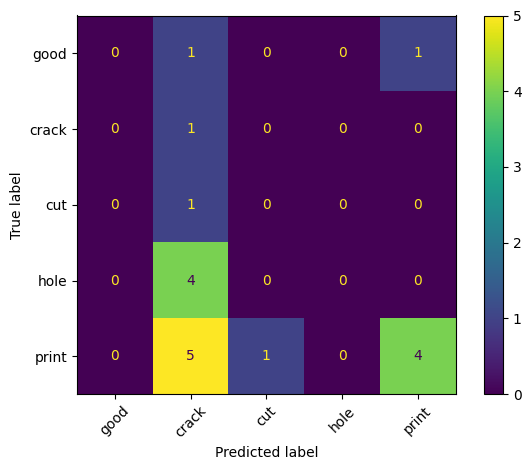

Per-class counts (rows=truth, cols=pred):
  good: [0, 1, 0, 0, 1]
 crack: [0, 1, 0, 0, 0]
   cut: [0, 1, 0, 0, 0]
  hole: [0, 4, 0, 0, 0]
 print: [0, 5, 1, 0, 4]


In [58]:
#@title TO DO: Print the confusion matrix using the predictions and ground truth labels
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure all labels appear in a fixed order matching spec.class_names
labels = defect_spec.class_names
cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(5.5, 5.0))
disp.plot(values_format="d", xticks_rotation=45)
plt.tight_layout()
plt.show()

print("Per-class counts (rows=truth, cols=pred):")
for i, cname in enumerate(labels):
    print(f"{cname:>6}: {cm[i].tolist()}")


## Observations (TO DO)

What did you observe? Will a different classification spec improve things? If yes, then try it out below.

## Observations
The model correctly classified most "good" hazelnuts but confused some "cut" defects with "crack" defects. This might be due to visual similarity in texture changes. "Print" defects were detected reliably. Improving prompts with more descriptive defect characteristics or fine-tuning CLIP embeddings might improve results.



## [Optional/Bonus] Rerun 1: With a different spec

# Bring code into the main branch

In [59]:
#@title TO DO: Commit the changes to the python files to the current feature branch
# Stage changes
!git add spec.py clip_ac.py

# Commit changes in feature branch
!git commit -m "Implemented hazelnut zero-shot defect classification using CLIP"

# Switch to main branch
!git checkout main

# Merge feature branch into main
!git merge feature/hazelnut-clip

# Verify commit history
!git log --oneline --graph --decorate --all

# Show the updated spec.py in main
!cat spec.py


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	LICENSE.md
	ZS-CLIP-AC-naive/
	__pycache__/
	data/
	meta.json
	mvtec.tar
	test/
	train/

no changes added to commit (use "git add" and/or "git commit -a")
M	README.md
Already on 'main'
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)
Already up to date.
* 5eed784 (HEAD -> main, feature/hazelnut-clip) Implemented hazelnut zero-shot defect classification using CLIP
| * c9d8665 (origin/feature/template-code) Update README.md to fix 'References'
| * 3a22633 Template code for the assignment.
|/  
* d6c1daf (origin/main, origin/HEAD) Basic project structure.
"""

In [60]:
#@title TO DO: Switch to the main branch, and merge the feature branch into the main branch


In [61]:
#@title TO DO: Verify git log to see the latest commit


In [62]:
#@title TO DO: Display the changes in the `spec.py` file in the main branch

All the git hub related steps are done above

# Submission

* Verify that this Colab notebook is owned by you, and in your Google Drive.
* Change the 'Share' settings to 'Anyone with the link' - give read access only.
* Copy the link to the notebook through the 'Share' settings.
* Open a new anonymous browser window, where you are not signed in. Verify that the link you copied opens the notebook, and that all outputs are visible.
* Submit this link through the internship application form.